# Chances of Texas beating A&M at home during 2025 season

I chose to predict the football match up between Texas A&M vs the Texas Longhorns as it's one of the biggest rivalries in all of college sports. As a UT fan, I wanted to figure ut how likely it is for UT football to come out on top, as this rivarly can go either way, however usually favoring UT.

In [ ]:
!pip install preliz


#We'll also need to re-import those libraries

import preliz as pz


#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 10.2 MB/s eta 0:00:00


## Prior

On 11/28/25, the Texas Longhorns take on the A&M aggies in Austin for the second consecutive matchup in 15 years, continuing the century long rivalry. I predict that UT has a .7 chance of beating A&M with a total win loss record of (76,37) in the past 131 years. Winning 76/113 games is slightly less than .7. However, A&M plays Texas at home in the 2025 season, giving them a much higher chance of winning at .78, therefore I predict the chances of winning are in between the two chances at .7.

<Axes: >

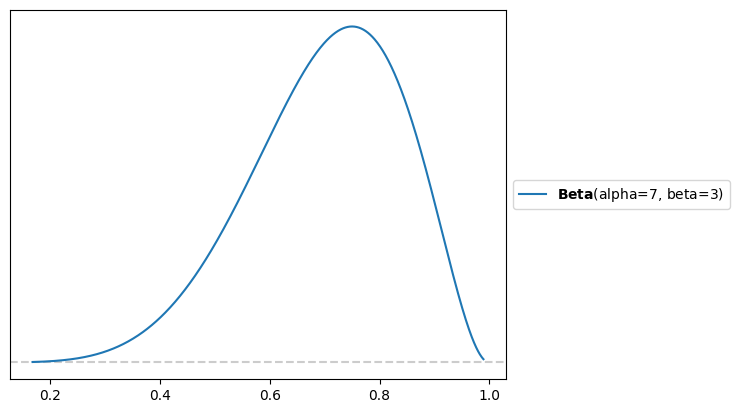

In [ ]:
pz.Beta(alpha=7,beta=3).plot_pdf()

## Likelihood

Texas played A&M at home 59 times, winning 46/59, showing the likelihood.

<Axes: >

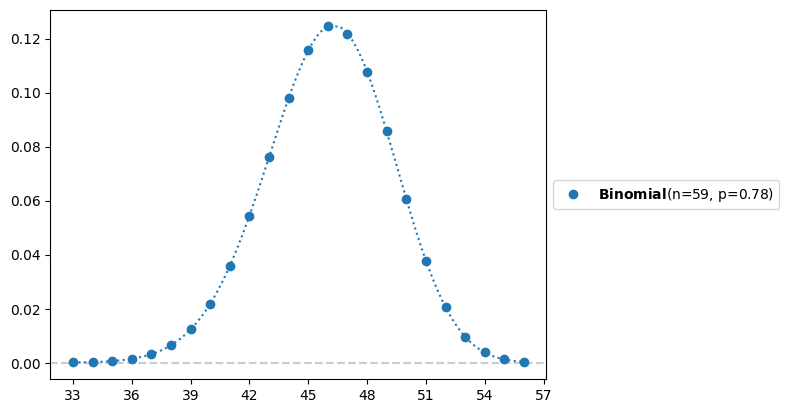

In [ ]:
pz.Binomial(59,46/59).plot_pdf()

## Posterior

Since 1894, UT has played A&M a total of 59 times, winning 46 games and losing 13 games. This gives an average of a .78 chance of winning. I used [1,0] as Texas can either win or lose, with no other outcomes. I used the data from the likelihood and prior to create my posterior over 3000 draws, better calculating the probability

In [ ]:
#Texas total wins against A&M at home since 1894, wins then losses
ut_football_data = np.repeat([1,0], repeats = [46,13])

In [ ]:
# Make sure to run the cell above that imports pymc as pm
with pm.Model() as football_model:
  θ = pm.Beta('θ' , alpha = 7. , beta = 3.)
  y = pm.Bernoulli('y', p = θ, observed = ut_football_data)
  idata_football = pm.sample(2000)

Output()

<Axes: title={'center': 'θ'}>

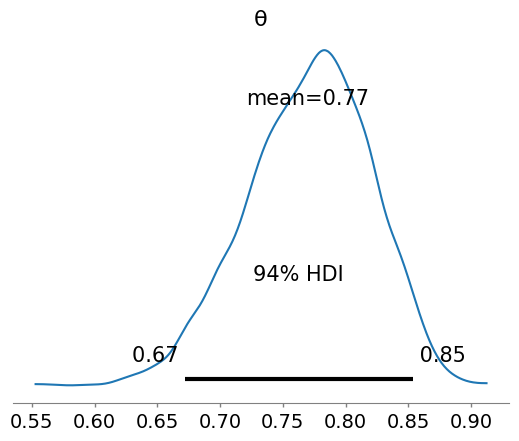

In [ ]:
az.plot_posterior(idata_football)

The Highest-Density interval shows a 94% probability of a .67 to .85 chance of winning, favoring the University of Texas highly. The average probability for the chance of winning is .77. The posterior was very close to my prior with an error of only .07. There is a very high chance of Texas defeating the Aggies at home in 2025.